# **NephroPredict: Machine Learning for Chronic Kidney Disease Detection**

## 1. **Project Overview**
The aim of this project is to build machine learning models that can accurately predict whether a patient has chronic kidney disease (CKD) or not based on medical diagnostic measurements. 

## **2. About Dataset**

**Context:**  
This dataset is originally from the UCI Machine Learning Repository. The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset.

**Content:**  
The dataset consists of several medical predictor variables and one target variable, `Class`. Predictor variables include:
- Blood Pressure (Bp)  
- Specific Gravity (Sg)  
- Albumin (Al)  
- Sugar (Su)  
- Red Blood Cells (Rbc)  
- Blood Urea (Bu)  
- Serum Creatinine (Sc)  
- Sodium (Sod)  
- Potassium (Pot)  
- Hemoglobin (Hemo)  
- White Blood Cell Count (Wbcc)  
- Red Blood Cell Count (Rbcc)  
- Hypertension (Htn)  

### 2.1.1 Target Variable:
- `Class`: 1 = Chronic Kidney Disease, 0 = No CKD  

### 2.1.2 Inspiration:  
The dataset can be used to develop a predictive model that assists medical professionals in early detection of CKD using patient diagnostic measurements.


## 2. **Imports & Setup**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

### 2.1 Load Dataset

In [2]:
dataset=pd.read_csv(r"E:\Machine Learning\Projects\liver\new_model.csv")

### 2.2 Basic info

In [3]:
print(dataset.shape)
print(dataset.head())
print(dataset.info())
print(dataset.describe())

(400, 14)
     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-nul

## 3. **Exploratory Data Analysis (EDA)**

### 3.1 Data Visualization

#### 3.1.1 Class distribution

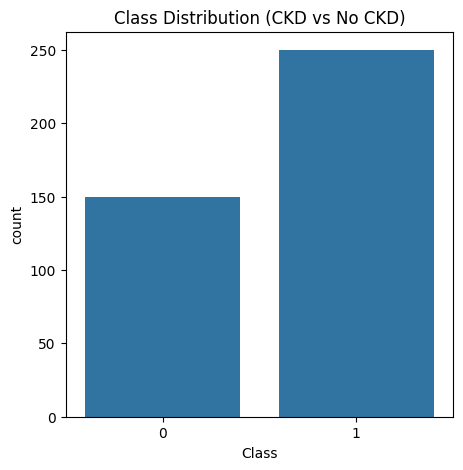

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class', data=dataset)
plt.title('Class Distribution (CKD vs No CKD)')
plt.show()

#### 3.1.2 Correlation heatmap

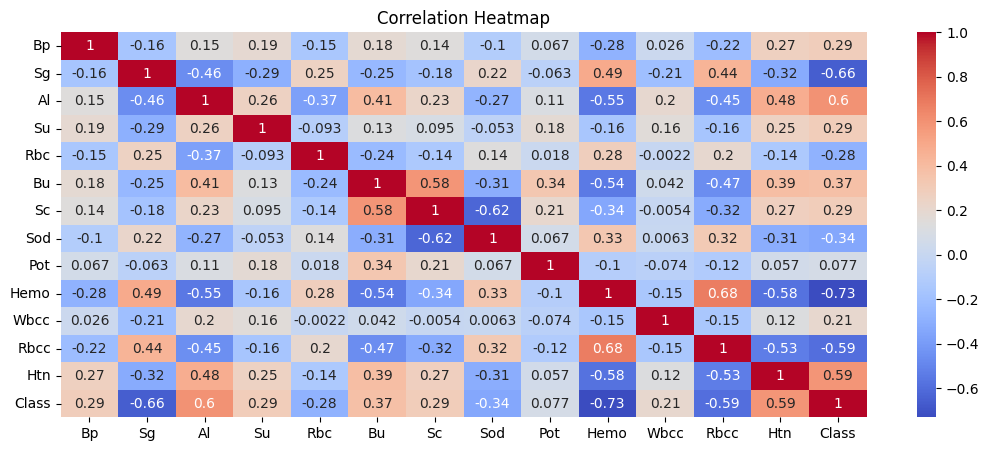

In [5]:
plt.figure(figsize=(13,5))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### 3.1.3 Pair Plot (Important Relationships)

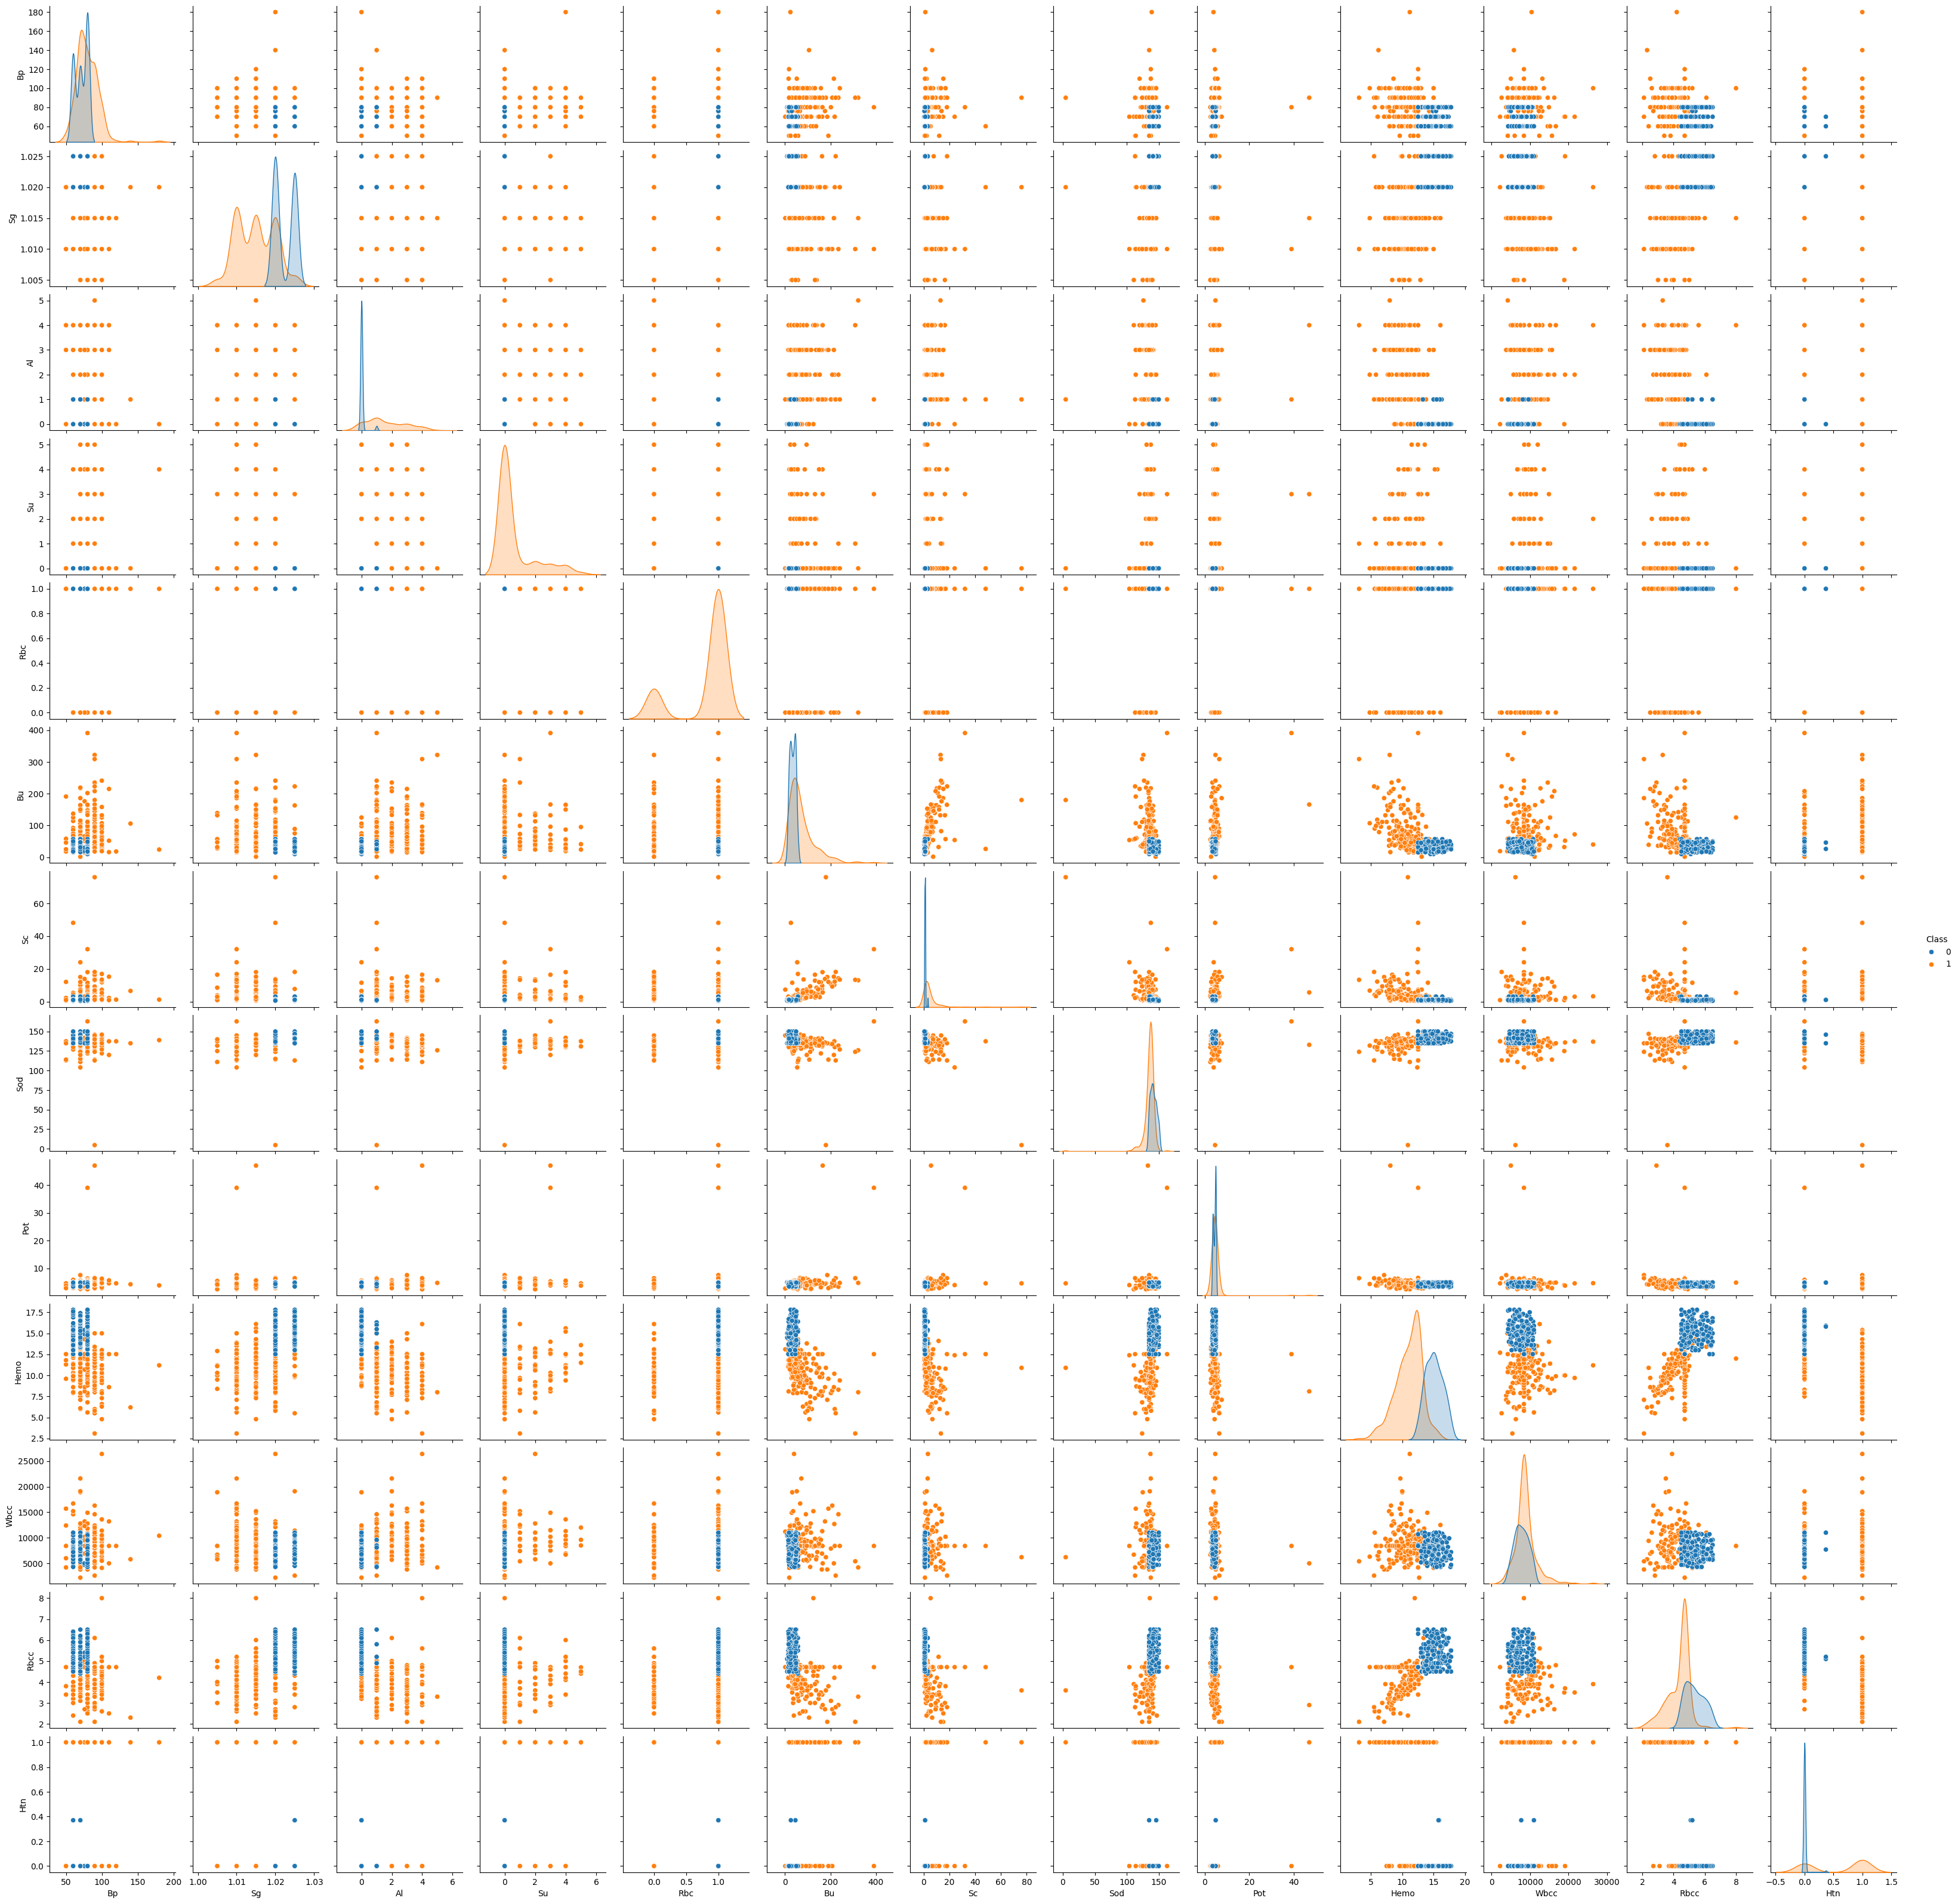

In [6]:
sns.pairplot(dataset, hue="Class")

#### 3.1.4. Distribution of Numeric Features

In [8]:
data=dataset

Text(0.5, 0.98, 'Distribution of Numeric Features')

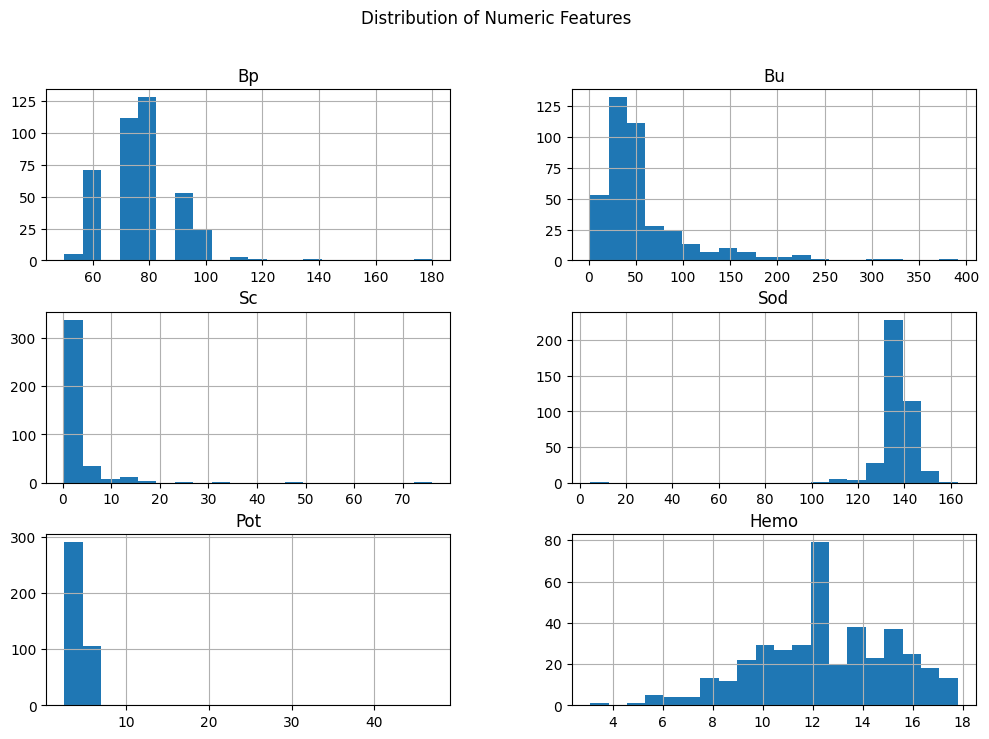

In [9]:
data[['Bp','Bu','Sc','Sod','Pot','Hemo']].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numeric Features")

## **4. Data Preprocessing**

### 4.1 Handle Null Values

In [10]:
data.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

### 4.2. Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
data["Bp"]=pd.DataFrame(sc.fit_transform(data[["Bp"]]))

In [13]:
data["Sg"]=pd.DataFrame(sc.fit_transform(data[["Sg"]]))

In [14]:
data["Al"]=pd.DataFrame(sc.fit_transform(data[["Al"]]))

In [15]:
data["Su"]=pd.DataFrame(sc.fit_transform(data[["Su"]]))

In [16]:
data["Rbc"]=pd.DataFrame(sc.fit_transform(data[["Rbc"]]))

In [17]:
data["Bu"]=pd.DataFrame(sc.fit_transform(data[["Bu"]]))

In [18]:
data["Sc"]=pd.DataFrame(sc.fit_transform(data[["Sc"]]))

In [19]:
data["Sod"]=pd.DataFrame(sc.fit_transform(data[["Sod"]]))

In [20]:
data["Pot"]=pd.DataFrame(sc.fit_transform(data[["Pot"]]))

In [21]:
data["Hemo"]=pd.DataFrame(sc.fit_transform(data[["Hemo"]]))

In [22]:
data["Wbcc"]=pd.DataFrame(sc.fit_transform(data[["Wbcc"]]))

In [23]:
data["Rbcc"]=pd.DataFrame(sc.fit_transform(data[["Rbcc"]]))

In [24]:
data["Htn"]=pd.DataFrame(sc.fit_transform(data[["Htn"]]))

### 4.3. Outlier Removal

In [25]:
q1 = data["Bp"].quantile(0.25)
q3 = data["Bp"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Bp"] >= min_range) & (data["Bp"] <= max_range)]

In [26]:
q1 = data["Sg"].quantile(0.25)
q3 = data["Sg"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Sg"] >= min_range) & (data["Sg"] <= max_range)]

In [27]:
q1 = data["Al"].quantile(0.25)
q3 = data["Al"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Al"] >= min_range) & (data["Al"] <= max_range)]

In [28]:
q1 = data["Su"].quantile(0.25)
q3 = data["Su"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Su"] >= min_range) & (data["Su"] <= max_range)]

In [29]:
q1 = data["Rbc"].quantile(0.25)
q3 = data["Rbc"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Rbc"] >= min_range) & (data["Rbc"] <= max_range)]

In [30]:
q1 = data["Bu"].quantile(0.25)
q3 = data["Bu"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Bu"] >= min_range) & (data["Bu"] <= max_range)]

In [31]:
q1 = data["Sc"].quantile(0.25)
q3 = data["Sc"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Sc"] >= min_range) & (data["Sc"] <= max_range)]

In [32]:
q1 = data["Sod"].quantile(0.25)
q3 = data["Sod"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Sod"] >= min_range) & (data["Sod"] <= max_range)]

In [33]:
q1 = data["Pot"].quantile(0.25)
q3 = data["Pot"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Pot"] >= min_range) & (data["Pot"] <= max_range)]

In [34]:
q1 = data["Hemo"].quantile(0.25)
q3 = data["Hemo"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Hemo"] >= min_range) & (data["Hemo"] <= max_range)]

In [35]:
q1 = data["Wbcc"].quantile(0.25)
q3 = data["Wbcc"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Wbcc"] >= min_range) & (data["Wbcc"] <= max_range)]

In [36]:
q1 = data["Rbcc"].quantile(0.25)
q3 = data["Rbcc"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Rbcc"] >= min_range) & (data["Rbcc"] <= max_range)]

In [37]:
q1 = data["Htn"].quantile(0.25)
q3 = data["Htn"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Htn"] >= min_range) & (data["Htn"] <= max_range)]

#### 4.3.1 Graph Analysis after Outlier Removal

In [38]:
import warnings
warnings.filterwarnings("ignore")

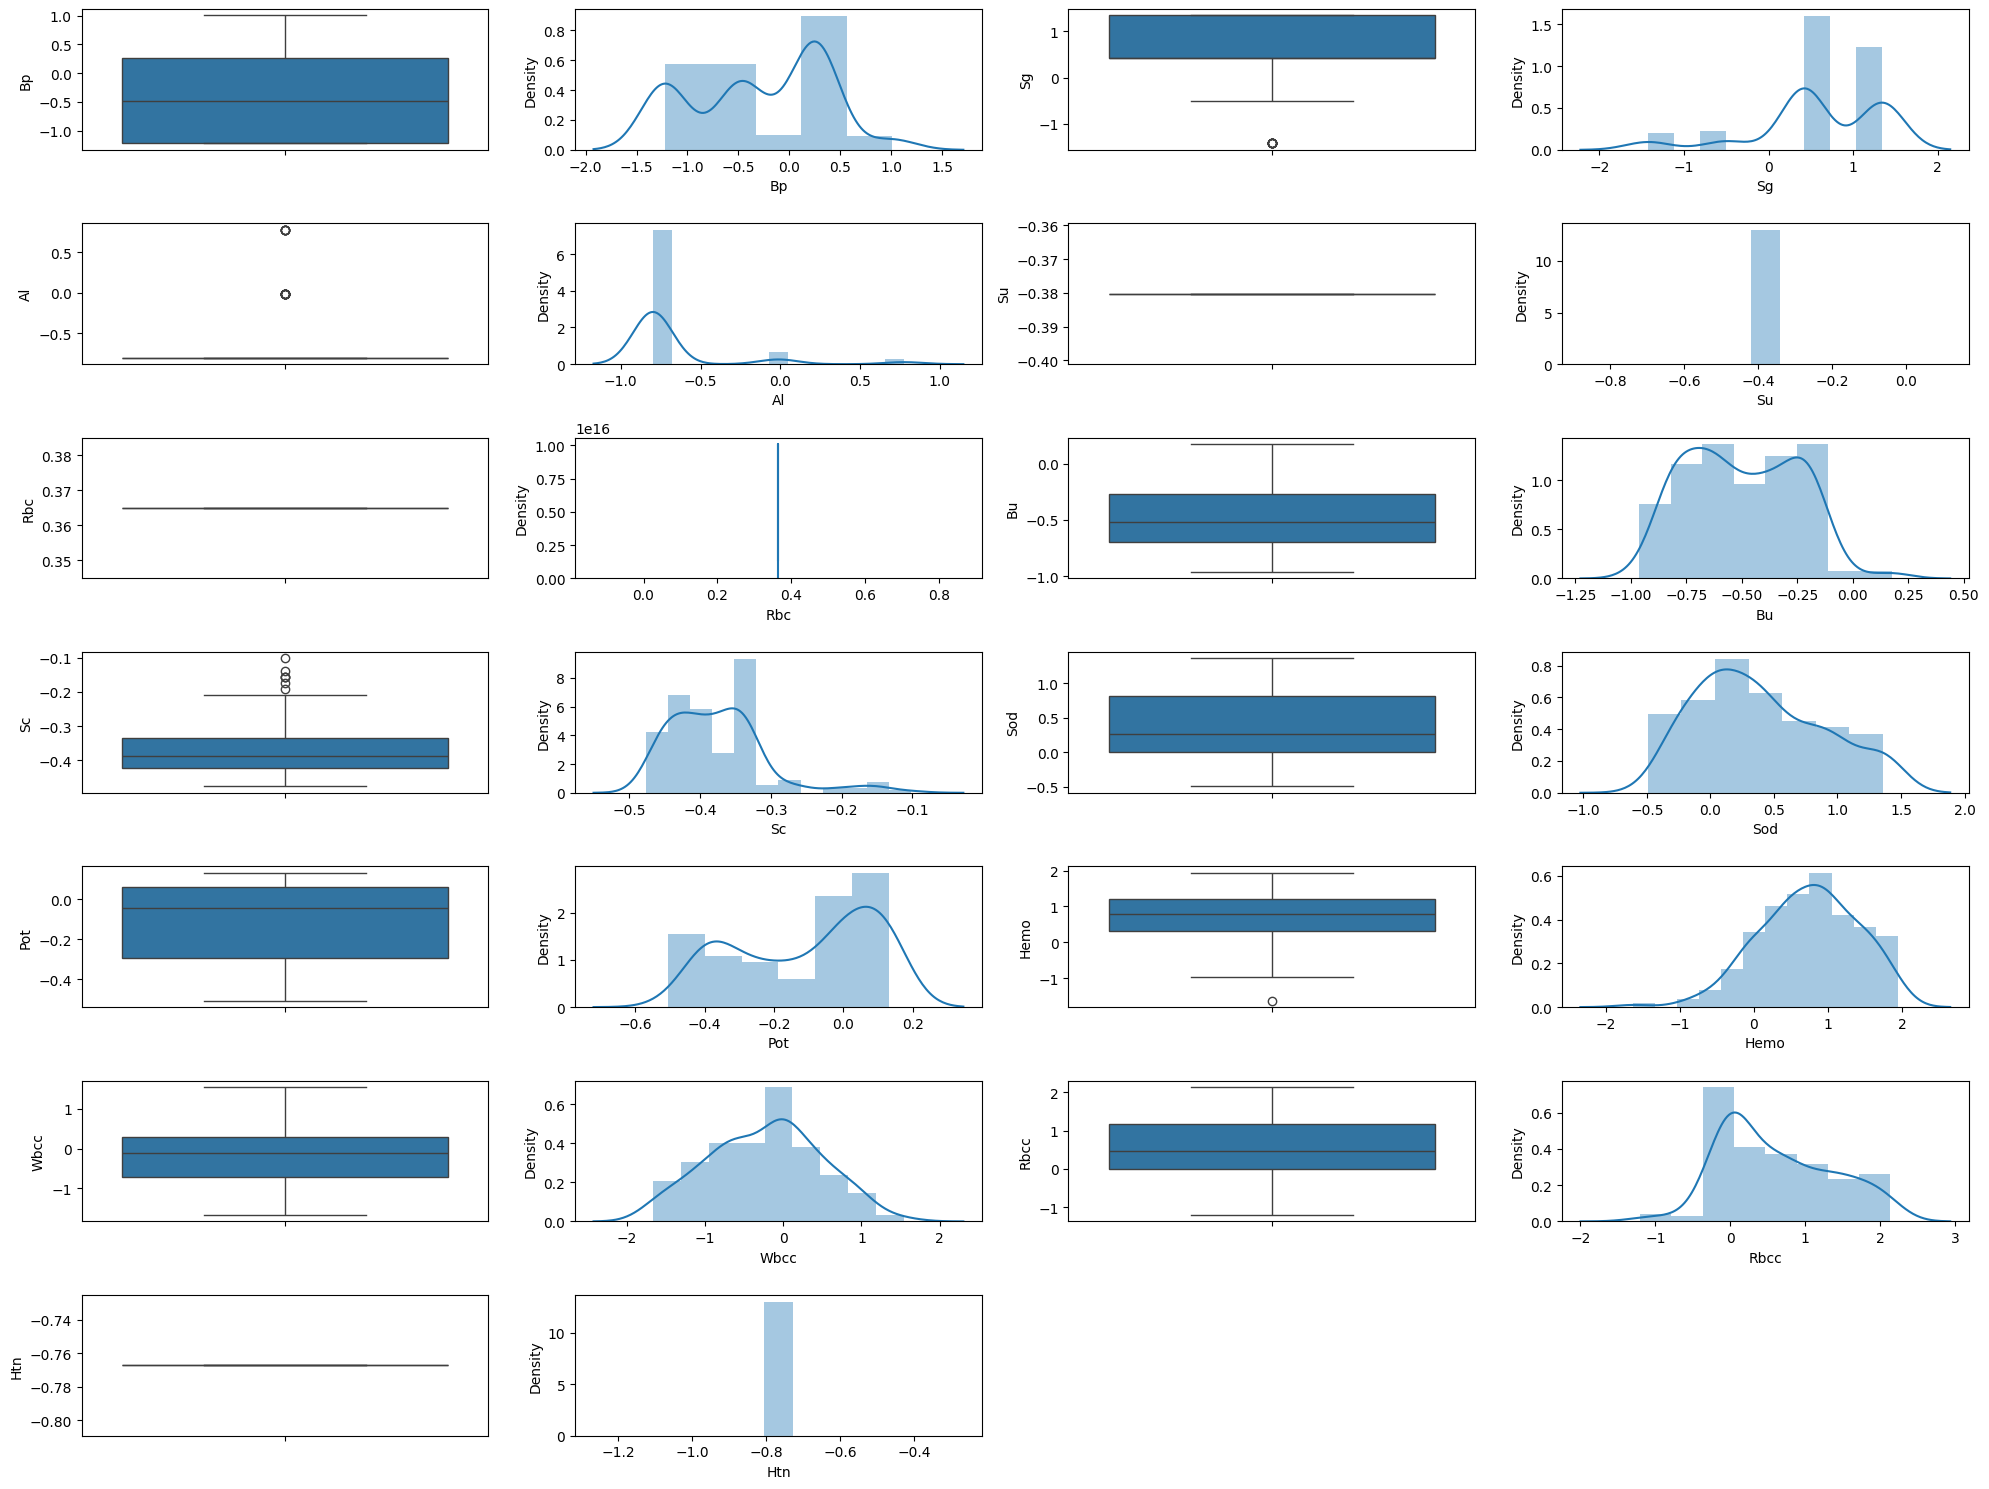

In [39]:
plt.figure(figsize=(20, 15))

plt.subplot(7, 4, 1)
sns.boxplot(data=data["Bp"])
plt.subplot(7, 4, 3)
sns.boxplot(data=data["Sg"])
plt.subplot(7, 4, 5)
sns.boxplot(data=data["Al"])
plt.subplot(7, 4, 7)
sns.boxplot(data=data["Su"])
plt.subplot(7, 4, 9)
sns.boxplot(data=data["Rbc"])
plt.subplot(7, 4, 11)
sns.boxplot(data=data["Bu"])
plt.subplot(7, 4, 13)
sns.boxplot(data=data["Sc"])
plt.subplot(7, 4, 15)
sns.boxplot(data=data["Sod"])
plt.subplot(7, 4, 17)
sns.boxplot(data=data["Pot"])
plt.subplot(7, 4, 19)
sns.boxplot(data=data["Hemo"])
plt.subplot(7, 4, 21)
sns.boxplot(data=data["Wbcc"])
plt.subplot(7, 4, 23)
sns.boxplot(data=data["Rbcc"])
plt.subplot(7, 4, 25)
sns.boxplot(data=data["Htn"])


plt.subplot(7, 4, 2)
sns.distplot(data['Bp'])
plt.subplot(7, 4, 4)
sns.distplot(data['Sg'])
plt.subplot(7, 4, 6)
sns.distplot(data['Al'])
plt.subplot(7, 4, 8)
sns.distplot(data['Su'])
plt.subplot(7, 4, 10)
sns.distplot(data['Rbc'])
plt.subplot(7, 4, 12)
sns.distplot(data['Bu'])
plt.subplot(7, 4, 14)
sns.distplot(data['Sc'])
plt.subplot(7, 4, 16)
sns.distplot(data['Sod'])
plt.subplot(7, 4, 18)
sns.distplot(data['Pot'])
plt.subplot(7, 4, 20)
sns.distplot(data['Hemo'])
plt.subplot(7, 4, 22)
sns.distplot(data['Wbcc'])
plt.subplot(7, 4, 24)
sns.distplot(data['Rbcc'])
plt.subplot(7, 4, 26)
sns.distplot(data['Htn'])

plt.tight_layout()
plt.show()


### 5.1 Graph Analysis after Complete Preprocessing

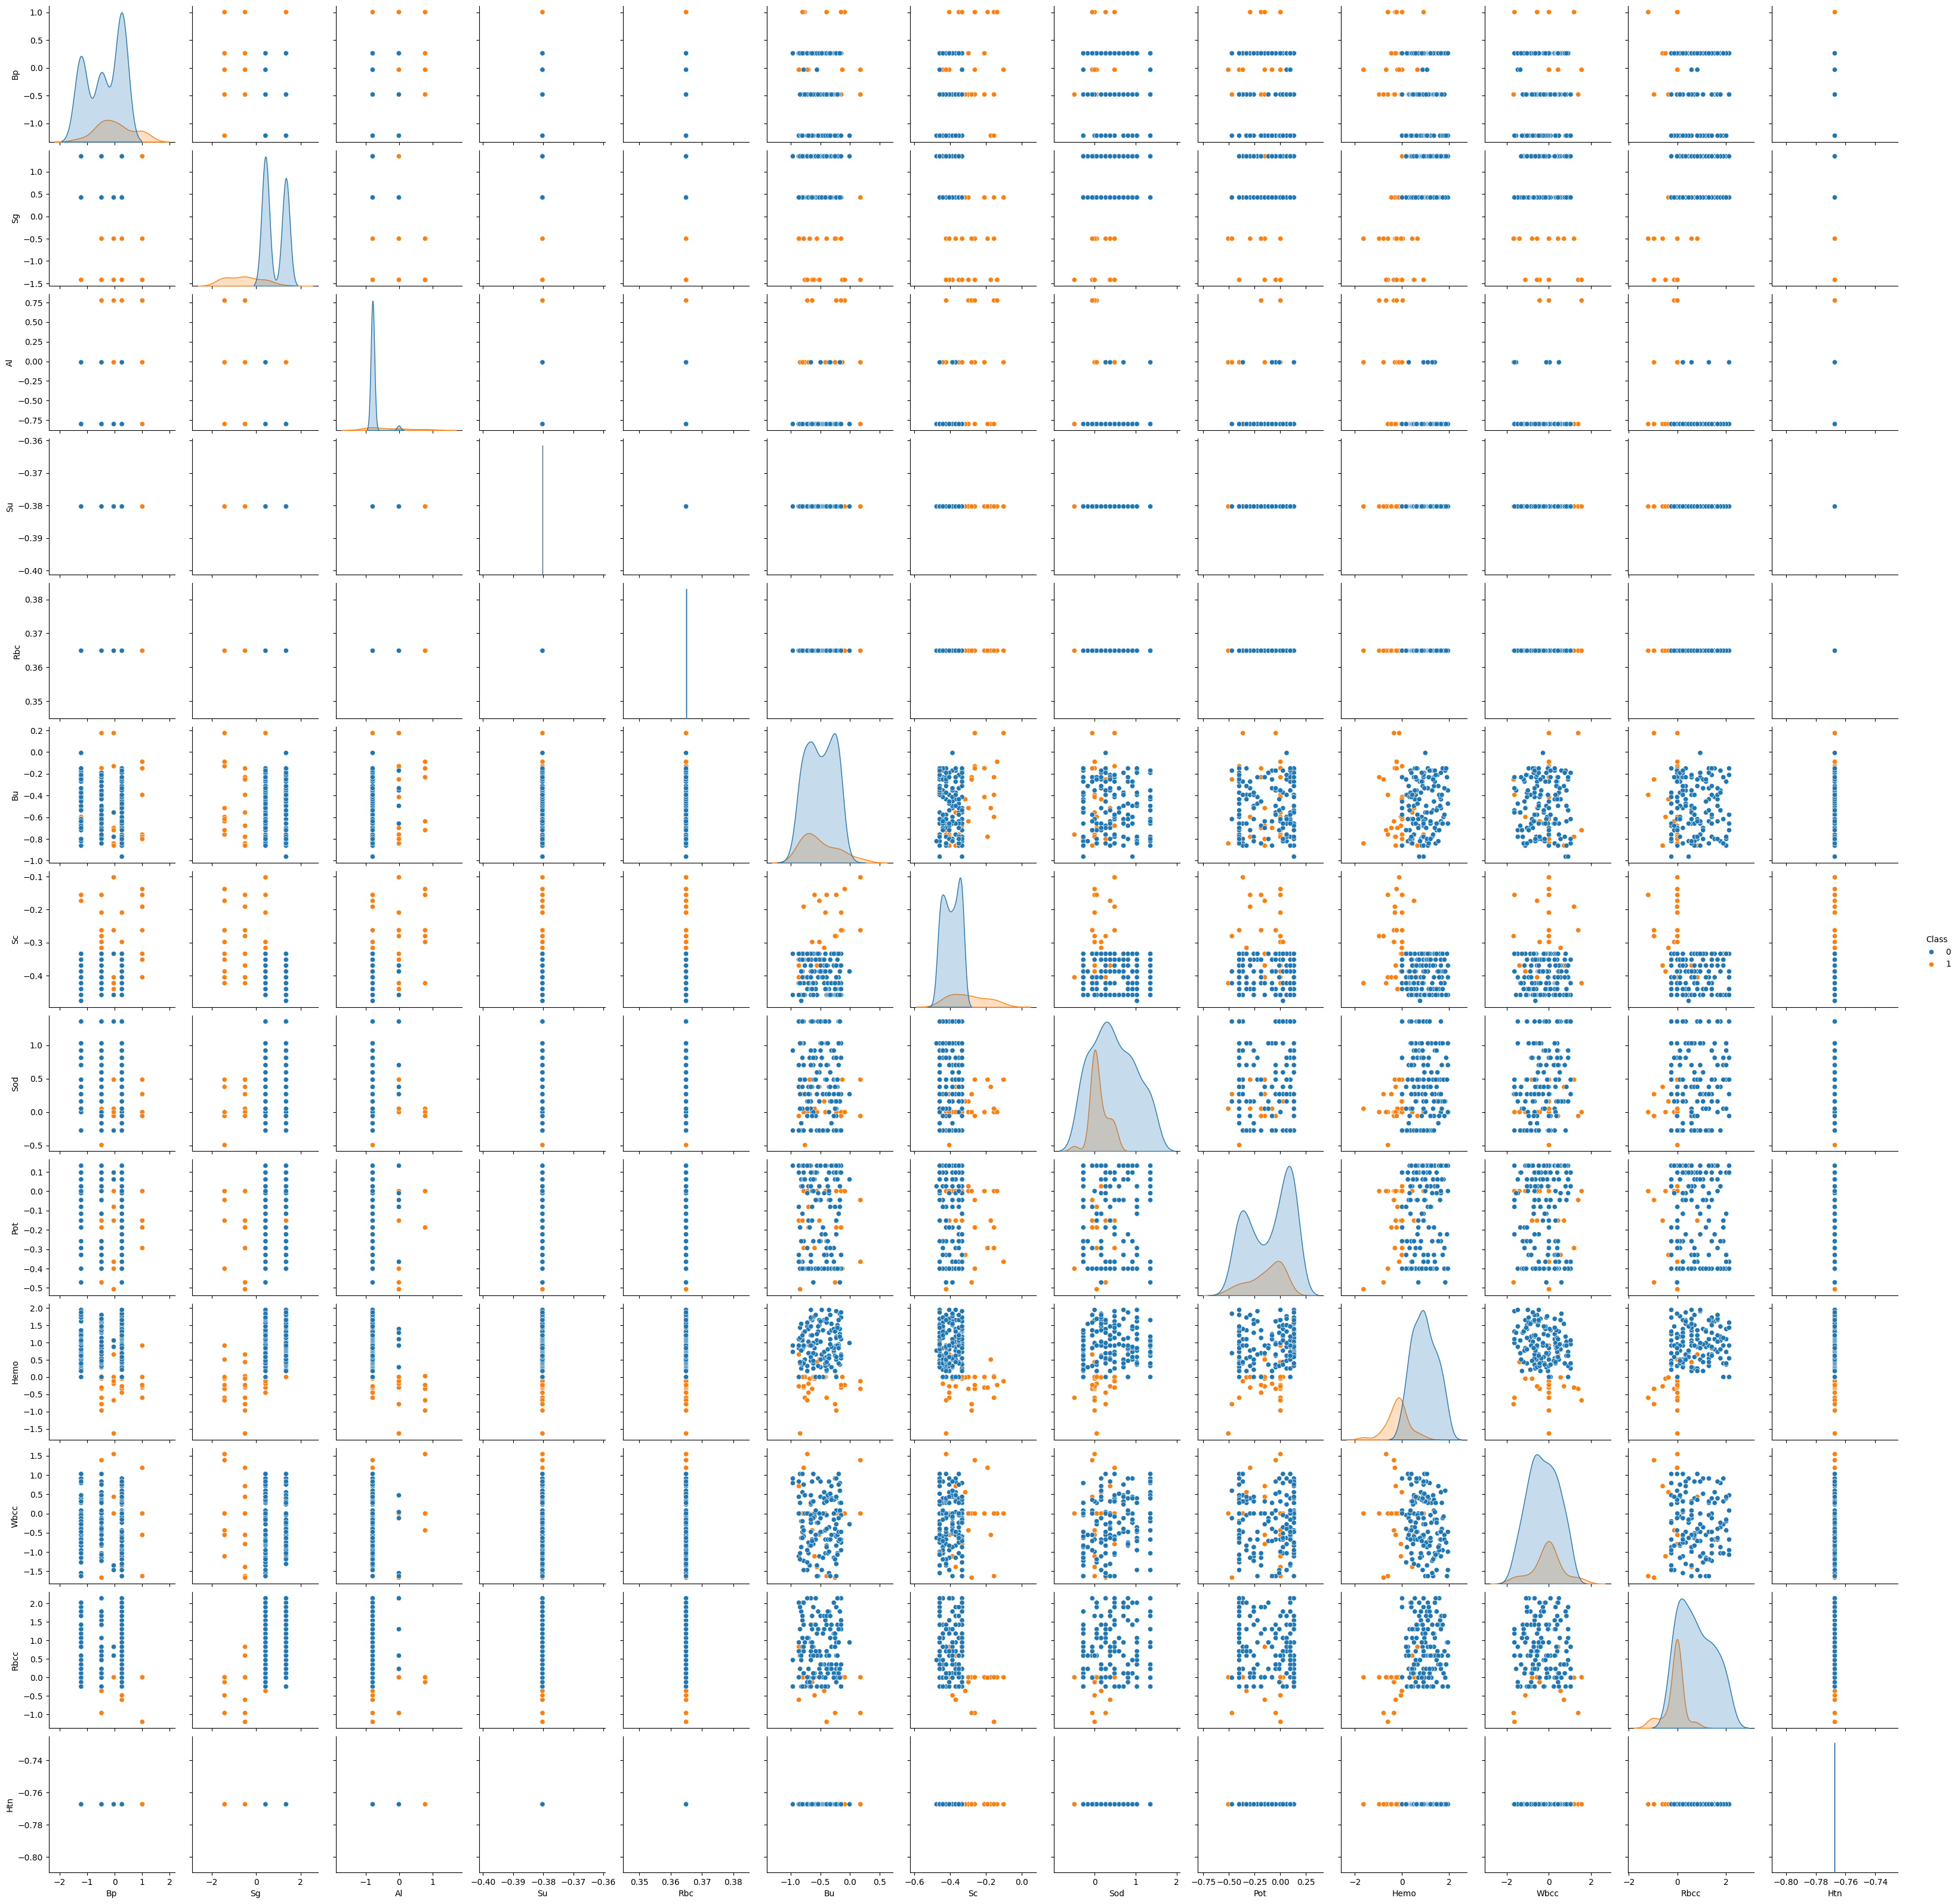

In [40]:
sns.pairplot(data, hue="Class")

## **5. Over-sampling**

In [41]:
x=data.iloc[:, :-1]
y=data["Class"]

In [42]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [43]:
smote=SMOTE( random_state=42)

In [44]:
x_res, y_res=smote.fit_resample(x, y)

In [45]:
Counter(y_res)

Counter({1: 143, 0: 143})

## 6. **Train Test Split**

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test=train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

### Evaluation Function

In [48]:
def evaluate_model(model, X_train, X_test, y_train, y_test, cv=5):
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    t_acc = model.score(x_test, y_test)*100
    train_acc = model.score(x_train, y_train)*100
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)*100
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)*100
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)*100
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')*100
    
    return {
        "Train Accuracy": train_acc,
        "Test Accuracy":  t_acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "CV Mean": np.mean(cv_scores),
        "CV Std": np.std(cv_scores)
    }


## 7. **Model training**

<h2 style="text-align: center;">7.1. Logistic Regression</h2>

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr_b=LogisticRegression()

In [51]:
lr_b.fit(x_train, y_train)

LogisticRegression()

#### Model Evaluation Before Tuning

In [52]:
results=pd.DataFrame()

In [53]:
metrics_lr = evaluate_model(lr_b, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_lr, index=["Logistic Regression (Before Tuning)"])])

#### Hyper Parameter Tuning

In [54]:
lf= {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'C': [0.01, 0.1, 1, 10, 100],              
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'], 
    'max_iter': [100, 200, 500, 1000],       
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]           
}

In [55]:
gvl=GridSearchCV(LogisticRegression(), param_grid=lf)

In [56]:
gvl.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg']})

In [57]:
gvl.best_score_*100

np.float64(98.67632850241546)

In [58]:
gvl.best_params_

{'C': 0.01, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

#### New Model After Tuning

In [59]:
lr=LogisticRegression(C= 0.01, l1_ratio= 0, max_iter= 100, penalty= 'l2', solver= 'lbfgs')

In [60]:
lr.fit(x_train, y_train)

LogisticRegression(C=0.01, l1_ratio=0)

#### Confusion Marix

In [61]:
cf_test=confusion_matrix(y_test, lr.predict(x_test))
cf_train=confusion_matrix(y_train, lr.predict(x_train))

**Train Matrix**

<Axes: >

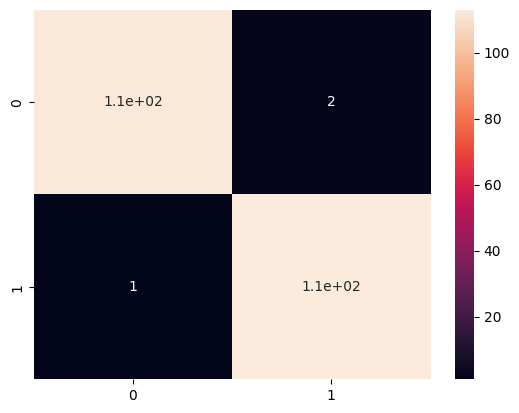

In [62]:
sns.heatmap(cf_train, annot=True)

**Test Matrix**

<Axes: >

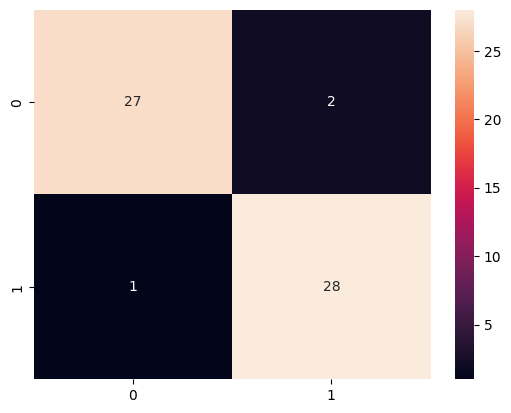

In [63]:
sns.heatmap(cf_test, annot=True)

#### Model Evaluation After Tuning

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
metrics_lr_t = evaluate_model(lr, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_lr_t, index=["Logistic Regression (After Tuning)"])])

#### Complete Result of Model

In [66]:
results.loc[["Logistic Regression (Before Tuning)", "Logistic Regression (After Tuning)"]]

Train Accuracy  Test Accuracy  Precision  \
Logistic Regression (Before Tuning)       99.561404      96.551724  96.774194   
Logistic Regression (After Tuning)        98.684211      94.827586  94.880952   

                                        Recall         F1    CV Mean    CV Std  
Logistic Regression (Before Tuning)  96.551724  96.547619  98.676329  1.773046  
Logistic Regression (After Tuning)   94.827586  94.826048  98.676329  1.773046

<h2 style="text-align: center;">7.2. K-Nearest Neighbors (KNN)</h2>

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
kn_b=KNeighborsClassifier()

In [69]:
kn_b.fit(x_train, y_train)

KNeighborsClassifier()

#### Model Evaluation Before Tuning

In [70]:
metrics_knn = evaluate_model(kn_b, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_knn, index=["K-Nearest Neighbors (KNN) (Before Tuning)"])])

#### Hyper Parameter Tuning

In [71]:
kf = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],     
    'weights': ['uniform', 'distance'],       
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
    'p': [1, 2] 
}

In [72]:
gvk=GridSearchCV(KNeighborsClassifier(), param_grid=kf)

In [73]:
gvk.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [74]:
gvk.best_score_*100

np.float64(98.66666666666667)

In [75]:
gvk.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}

#### New Model After Tuning

In [76]:
kn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 13, p= 1, weights= 'distance')

In [77]:
kn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13, p=1,
                     weights='distance')

#### Confusion Matrix

In [78]:
kcf_test=confusion_matrix(y_test, kn.predict(x_test))
kcf_train=confusion_matrix(y_train, kn.predict(x_train))

**Train Matrix**

<Axes: >

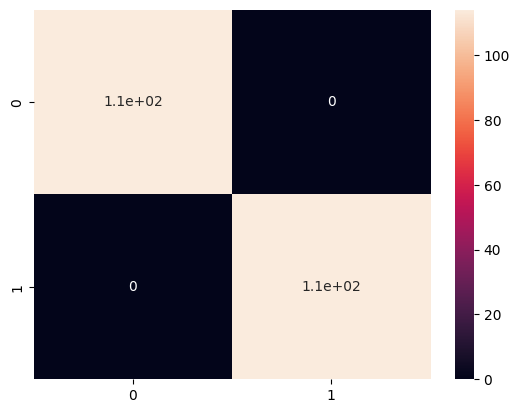

In [79]:
sns.heatmap(kcf_train, annot=True)

**Train Matrix**

<Axes: >

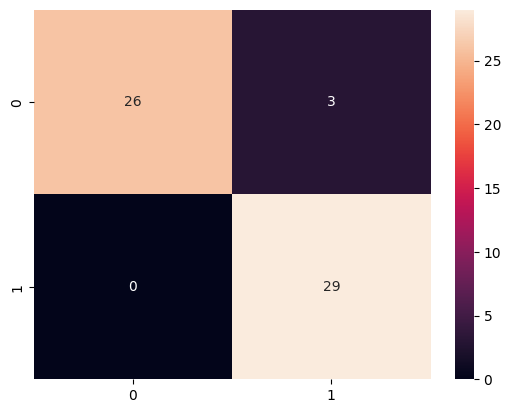

In [80]:
sns.heatmap(kcf_test, annot=True)

#### Model Evaluation After Tuning

In [81]:
metrics_knn_t = evaluate_model(kn, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_knn_t, index=["K-Nearest Neighbors (KNN) (After Tuning)"])])

#### Complete Result of Model

In [82]:
results.loc[["K-Nearest Neighbors (KNN) (Before Tuning)", "K-Nearest Neighbors (KNN) (After Tuning)"]]

Train Accuracy  Test Accuracy  \
K-Nearest Neighbors (KNN) (Before Tuning)       98.245614      93.103448   
K-Nearest Neighbors (KNN) (After Tuning)       100.000000      94.827586   

                                           Precision     Recall         F1  \
K-Nearest Neighbors (KNN) (Before Tuning)  93.939394  93.103448  93.070490   
K-Nearest Neighbors (KNN) (After Tuning)   95.312500  94.827586  94.813711   

                                             CV Mean    CV Std  
K-Nearest Neighbors (KNN) (Before Tuning)  97.806763  1.405656  
K-Nearest Neighbors (KNN) (After Tuning)   98.666667  1.777778


<h2 style="text-align: center;">7.3. Support Vector Machine (SVM)</h2>


In [83]:
from sklearn.svm import SVC

In [84]:
sv_b=SVC()

In [85]:
sv_b.fit(x_train, y_train)

SVC()

In [86]:
sv_b.score(x_train, y_train)*100, sv_b.score(x_test, y_test)*100

(99.12280701754386, 93.10344827586206)

#### Model Evaluation Before Tuning

In [87]:
metrics_svc = evaluate_model(sv_b, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_svc, index=["Support Vector Machine (Before Tuning)"])])

#### Hyper parameter Tuning

In [88]:
svf = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],   
    'C': [0.1, 1, 10, 100],                     
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
    'degree': [2, 3, 4, 5],                  
    'coef0': [0.0, 0.1, 0.5, 1.0]                   
}

In [89]:
rsv = RandomizedSearchCV(
    SVC(),
    param_distributions=svf,
    n_iter=20,  
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [90]:
rsv.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0.0, 0.1, 0.5, 1.0],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, verbose=2)

In [91]:
rsv.best_score_*100

np.float64(99.12280701754386)

In [92]:
rsv.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'degree': 5, 'coef0': 0.5, 'C': 10}

#### New Model after Tuning

In [93]:
sv=SVC(  C=10, coef0=0.5, degree=5,gamma=0.001, kernel='linear')

In [94]:
sv.fit(x_train, y_train)

SVC(C=10, coef0=0.5, degree=5, gamma=0.001, kernel='linear')

In [95]:
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(99.56140350877193, 96.55172413793103)

#### Confusion Matrix

In [96]:
scf_test=confusion_matrix(y_test, sv.predict(x_test))
scf_train=confusion_matrix(y_train, sv.predict(x_train))

**Train Matrix**

<Axes: >

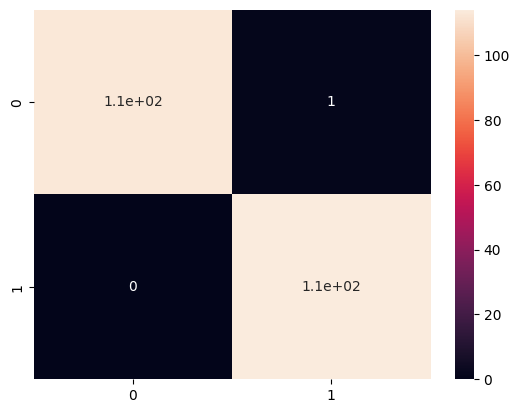

In [97]:
sns.heatmap(scf_train, annot=True)

**Test Matrix**

<Axes: >

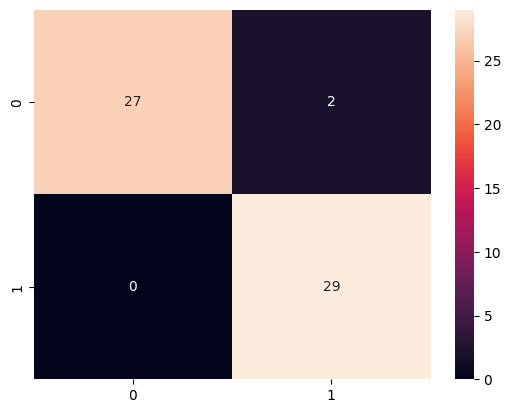

In [98]:
sns.heatmap(scf_test, annot=True)

#### Model Evaluation After Tuning

In [99]:
metrics_svc_t = evaluate_model(sv, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_svc_t, index=["Support Vector Machine (After Tuning)"])])

#### Complete Result of Model

In [100]:
results.loc[["Support Vector Machine (Before Tuning)", "Support Vector Machine (After Tuning)"]]

Train Accuracy  Test Accuracy  \
Support Vector Machine (Before Tuning)       99.122807      93.103448   
Support Vector Machine (After Tuning)        99.561404      96.551724   

                                        Precision     Recall         F1  \
Support Vector Machine (Before Tuning)  93.309438  93.103448  93.095238   
Support Vector Machine (After Tuning)   96.774194  96.551724  96.547619   

                                          CV Mean    CV Std  
Support Vector Machine (Before Tuning)  99.120773  1.076937  
Support Vector Machine (After Tuning)   98.241546  2.153874



<h2 style="text-align: center;">7.4. Decision Tree</h2>


In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt_b=DecisionTreeClassifier()

In [103]:
dt_b.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
dt_b.score(x_train, y_train)*100, dt_b.score(x_test, y_test)*100

(100.0, 96.55172413793103)

#### Model Evaluation Before Tuning

In [105]:
metrics_dt = evaluate_model(dt_b, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_dt, index=["Decision Tree (Before Tuning)"])])

#### Hyper Parameter Tuning

In [106]:
pdt = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],            
    "max_depth": [None, 5, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10, 20],          
    "min_samples_leaf": [1, 2, 4, 10],             
    "max_features": [None, "sqrt", "log2"],       
}


In [107]:
dgv=GridSearchCV(DecisionTreeClassifier(), param_grid=pdt)

In [108]:
dgv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 30, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']})

In [109]:
dgv.best_score_*100

np.float64(100.0)

In [110]:
dgv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

#### New Model after Tuning

In [111]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=20, splitter='random',
random_state=42
)

In [112]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=20, random_state=42,
                       splitter='random')

In [113]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(97.80701754385966, 93.10344827586206)

#### Confusion Matrix

In [114]:
dcf_test=confusion_matrix(y_test, dt.predict(x_test))
dcf_train=confusion_matrix(y_train, dt.predict(x_train))

**Train Matrix**

<Axes: >

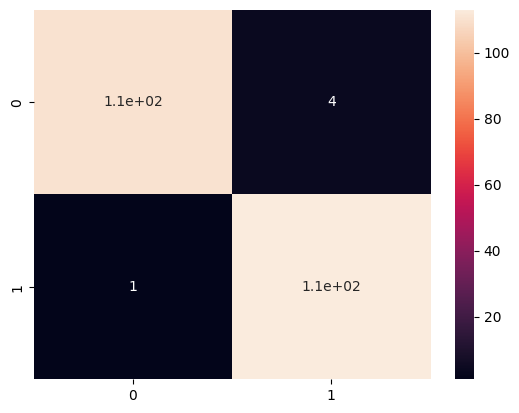

In [115]:
sns.heatmap(dcf_train, annot=True)

**Test Matrix**

<Axes: >

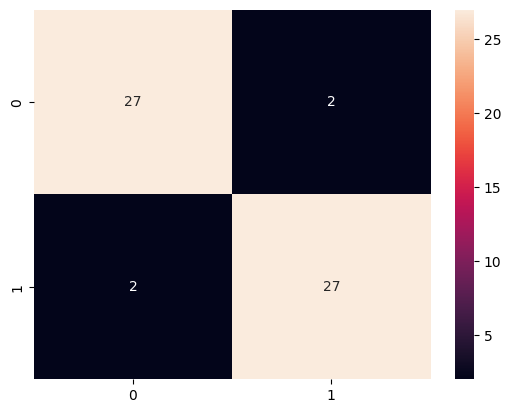

In [116]:
sns.heatmap(dcf_test, annot=True)

#### Model Evaluation After Tuning

In [117]:
metrics_dt_t = evaluate_model(dt, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_dt_t, index=["Decision Tree (After Tuning)"])])

#### Complete Result of Model

In [118]:
results.loc[["Decision Tree (Before Tuning)", "Decision Tree (After Tuning)"]]

Train Accuracy  Test Accuracy  Precision  \
Decision Tree (Before Tuning)      100.000000      94.827586  94.880952   
Decision Tree (After Tuning)        97.807018      93.103448  93.103448   

                                  Recall         F1    CV Mean    CV Std  
Decision Tree (Before Tuning)  94.827586  94.826048  98.666667  1.777778  
Decision Tree (After Tuning)   93.103448  93.103448  95.632850  4.124891




<h2 style="text-align: center;">7.5. Random Forest</h2>


In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf_b=RandomForestClassifier()

In [121]:
rf_b.fit(x_train, y_train)

RandomForestClassifier()

In [122]:
rf_b.score(x_train, y_train)*100, rf_b.score(x_test, y_test)*100

(100.0, 96.55172413793103)

#### Model Evaluation Before Tuning

In [123]:
metrics_rf = evaluate_model(rf_b, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_rf, index=["Random Forest (Before Tuning)"])])

#### Hyperparameter Tuning

In [124]:
prf = {
    'n_estimators': [100, 200, 300, 500],  
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': [1,2,3,4,5,6,7,8,9,10],    
    'max_features': ['sqrt', 'log2', None],      
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4, 10], 
    'bootstrap': [True, False]                
}


In [125]:
rgf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=prf,
    n_iter=20,   
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [126]:
rgf.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [127]:
rgf.best_score_*100

np.float64(99.56140350877193)

In [128]:
rgf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': False}

#### New Model After Tuning

In [129]:
rf=RandomForestClassifier(n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=7,
    criterion='gini',
    bootstrap=False)

In [130]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_split=5,
                       n_estimators=500)

In [131]:
rf.score(x_train, y_train)*100, rf_b.score(x_test, y_test)*100

(100.0, 96.55172413793103)

#### Confusion Matrix

In [132]:
rcf_test=confusion_matrix(y_test, rf.predict(x_test))
rcf_train=confusion_matrix(y_train, rf.predict(x_train))

**Train Matrix**

<Axes: >

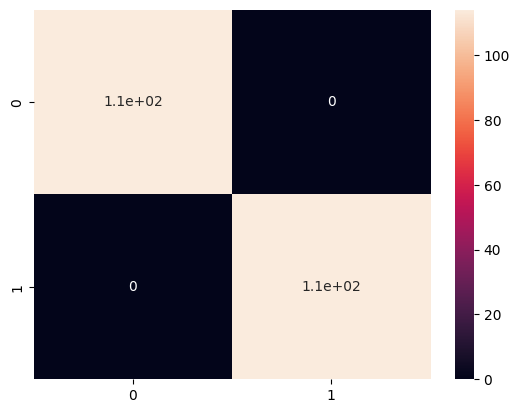

In [133]:
sns.heatmap(rcf_train, annot=True)

**Test Matrix**

<Axes: >

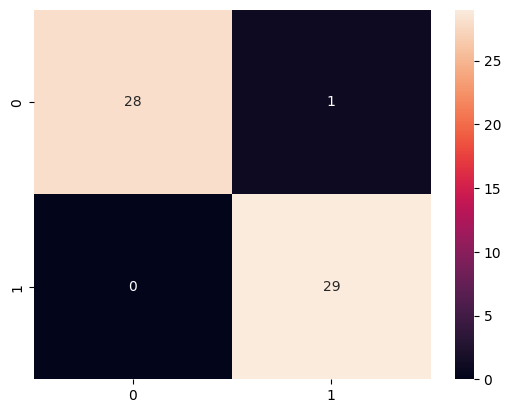

In [134]:
sns.heatmap(rcf_test, annot=True)

#### Model Evaluation After Tuning

In [135]:
metrics_rf_t = evaluate_model(rf, x_train, x_test, y_train, y_test)
results = pd.concat([results, pd.DataFrame(metrics_rf_t, index=["Random Forest (After Tuning)"])])

#### Complete Result of Model

In [136]:
results.loc[["Random Forest (Before Tuning)", "Random Forest (After Tuning)"]]

Train Accuracy  Test Accuracy  Precision  \
Random Forest (Before Tuning)           100.0      96.551724  96.774194   
Random Forest (After Tuning)            100.0      96.551724  96.774194   

                                  Recall         F1    CV Mean    CV Std  
Random Forest (Before Tuning)  96.551724  96.547619  99.111111  1.088662  
Random Forest (After Tuning)   96.551724  96.547619  99.555556  0.888889

## 8. Complete Results & Comparison

### 8.1. Results

In [137]:
df = results

s = df.style.set_table_styles(
    [
        {'selector': 'th', 
         'props': [('background-color', '#1f2937'),  # dark grey/blue
                   ('color', 'white'), 
                   ('font-size', '11pt'),
                   ('text-align', 'center'),
                   ('padding', '8px')]},
        
        {'selector': 'td', 
         'props': [('font-size', '10.5pt'), 
                   ('text-align', 'center'),
                   ('padding', '6px')]}
    ]
).set_properties(**{'border': '1px solid #ddd'}) \
 .set_caption(" Model Evaluation Metrics (Before & After Tuning)") \
 .highlight_max(subset=["Test Accuracy","F1"], color='#d1fae5') \
 .format("{:.2f}") \
 .apply(lambda x: ['background-color: #f9fafb' if i%2==0 else '' for i in range(len(x))], axis=0)

s


### 8.2. **Comparison**

The performance evaluation of multiple machine learning models, both before and after hyperparameter tuning, highlights the following:

- **Logistic Regression**: Delivered high accuracy in its default setting; tuning did not improve performance and even led to a slight decrease in generalization.  

- **K-Nearest Neighbors (KNN)**: Achieved *100% training accuracy* after tuning, but only marginal improvement on test accuracy, indicating potential overfitting.  

- **Support Vector Machine (SVM)**: Demonstrated a clear boost in accuracy after tuning, proving the significance of hyperparameters such as kernel type and regularization.  

- **Decision Tree**: Initially performed very well, but post-tuning adjustments slightly reduced accuracy, suggesting that optimal tree depth and splitting criteria are crucial.  

- **Random Forest**: Emerged as the most consistent and reliable model with *100% training accuracy* and **96.55% test accuracy** before and after tuning, confirming its robustness against overfitting.  

---

**Overall**, **Random Forest** outperformed all other classifiers and can be recommended as the **best-performing model** for this dataset.


#### 8.2.1 Comparison Chart

<Figure size 1100x500 with 0 Axes>

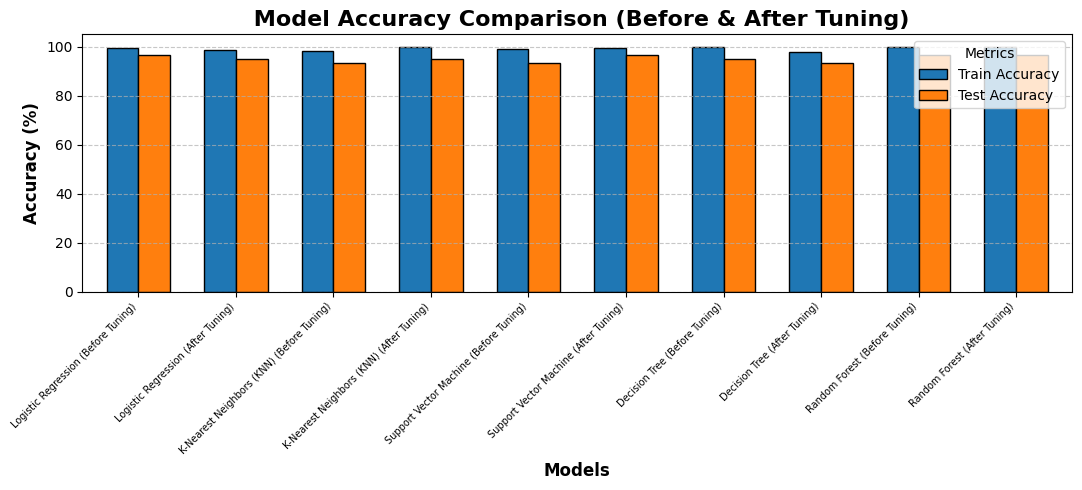

In [138]:
import matplotlib.pyplot as plt
subset = results[["Train Accuracy", "Test Accuracy"]]
plt.figure(figsize=(11,5))
subset.plot(kind="bar", figsize=(11,5), edgecolor="black", width=0.65)
plt.title(" Model Accuracy Comparison (Before & After Tuning)", fontsize=16, fontweight="bold")
plt.xlabel("Models", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=7)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Metrics", fontsize=10)
plt.tight_layout()
plt.show()


# Conclusion

This project successfully applied multiple machine learning algorithms to predict **Chronic Kidney Disease (CKD)** using diagnostic medical data.  
The comparative analysis showed that while most models achieved high performance, **Random Forest consistently outperformed others** with excellent accuracy, precision, recall, and robustness against overfitting.  

The results highlight the potential of machine learning in **early CKD detection**, which can significantly aid healthcare professionals in timely diagnosis and patient care.  

Future enhancements could include:
- Using larger and more diverse datasets.  
- Applying advanced ensemble methods or deep learning models.  
- Exploring feature importance for medical insights.  

Overall, the study demonstrates that machine learning, particularly **Random Forest**, is a highly effective approach for CKD prediction.

---